In [ ]:
#Geospatial statistics on Census data of Los Angeles

#1.Spatial autocorrelation
#Reading data in geojson format
#Selecting the required columns from the dataframe
#Renaming the columns of dataframe

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
#import contextily as ctx #For base maps

In [2]:
#Reading data in geojson format
gdf=gpd.read_file(r'F:\python\RS_GIS_Python\workshop-python-spatial-stats-main\data\acs2018_5yr_B01003_15000US060372711003.geojson')
gdf.head()

,geoid,name,B01003001,"B01003001, Error",geometry
0,15000US060371011101,"Block Group 1, Los Angeles, CA",1806.0,332.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,15000US060371011102,"Block Group 2, Los Angeles, CA",1529.0,375.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,15000US060371011103,"Block Group 3, Los Angeles, CA",979.0,250.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
3,15000US060371011221,"Block Group 1, Los Angeles, CA",2093.0,410.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
4,15000US060371011222,"Block Group 2, Los Angeles, CA",1146.0,281.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."


In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2516 non-null   object  
 1   name              2516 non-null   object  
 2   B01003001         2516 non-null   float64 
 3   B01003001, Error  2516 non-null   float64 
 4   geometry          2516 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 98.4+ KB


In [4]:
gdf.shape

(2516, 5)

In [5]:
gdf.columns

Index(['geoid', 'name', 'B01003001', 'B01003001, Error', 'geometry'], dtype='object')

In [7]:
#Selecting required columns
gdf=gdf[['geoid','B01003001', 'geometry']]
gdf.head()

,geoid,B01003001,geometry
0,15000US060371011101,1806.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,15000US060371011102,1529.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,15000US060371011103,979.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
3,15000US060371011221,2093.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
4,15000US060371011222,1146.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."


In [8]:
#Renaming the columns
gdf.columns=['FIPA','TotalPop','geometry']
gdf.head()

,FIPA,TotalPop,geometry
0,15000US060371011101,1806.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,15000US060371011102,1529.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,15000US060371011103,979.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
3,15000US060371011221,2093.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
4,15000US060371011222,1146.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."


In [9]:
#Last 5 rows
gdf.tail()

,FIPA,TotalPop,geometry
2511,15000US060379800261,37.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,15000US060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,15000US060379800311,1113.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,15000US060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2515,16000US0644000,3959657.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [10]:
#Deleting the row based on index (#Here last row is deleted)
gdf=gdf.drop(2515)
gdf.tail()

,FIPA,TotalPop,geometry
2510,15000US060379800241,264.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
2511,15000US060379800261,37.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,15000US060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,15000US060379800311,1113.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,15000US060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [12]:
#As 15000US is common in all rows of column 'FIPA',Lets remove the common string from all rows
gdf['FIPA']=gdf['FIPA'].str.replace('15000US','')
gdf.tail()

,FIPA,TotalPop,geometry
2510,060379800241,264.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
2511,060379800261,37.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,060379800311,1113.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [13]:
#Sort data
#Get rid of census block groups with less than 100 total population
gdf.sort_values(by='TotalPop').head(20)

,FIPA,TotalPop,geometry
2514,060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2506,060379800201,0.0,"MULTIPOLYGON (((-118.34412 34.21700, -118.3438..."
2358,060372772002,0.0,"MULTIPOLYGON (((-118.38597 33.94734, -118.3859..."
2512,060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2509,060379800231,0.0,"MULTIPOLYGON (((-118.64870 34.23120, -118.6480..."
2508,060379800221,0.0,"MULTIPOLYGON (((-118.50266 34.30809, -118.5026..."
2501,060379800091,5.0,"MULTIPOLYGON (((-118.33707 34.14160, -118.3361..."
2503,060379800141,10.0,"MULTIPOLYGON (((-118.26088 33.76850, -118.2602..."
2507,060379800211,12.0,"MULTIPOLYGON (((-118.40183 34.26509, -118.4017..."
2511,060379800261,37.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."


In [16]:
#Subsetting the data
gdf_1=gdf[gdf['TotalPop']>100]
gdf_1.sort_values(by='TotalPop').head(10)

,FIPA,TotalPop,geometry
2499,060379302002,118.0,"MULTIPOLYGON (((-118.51028 34.34504, -118.5102..."
2505,060379800191,151.0,"MULTIPOLYGON (((-118.59919 34.07436, -118.5991..."
2502,060379800101,189.0,"MULTIPOLYGON (((-118.25165 34.08038, -118.2515..."
2510,060379800241,264.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
2360,060372774002,294.0,"MULTIPOLYGON (((-118.37868 33.95180, -118.3786..."
2498,060379302001,301.0,"MULTIPOLYGON (((-118.41035 34.29197, -118.4102..."
2284,060372736003,310.0,"MULTIPOLYGON (((-118.46583 33.99098, -118.4657..."
2092,060372640001,320.0,"MULTIPOLYGON (((-118.49381 34.05010, -118.4938..."
1868,060372371013,321.0,"MULTIPOLYGON (((-118.29148 33.98586, -118.2914..."
1045,060371913022,335.0,"MULTIPOLYGON (((-118.29177 34.10123, -118.2900..."


<Axes: >

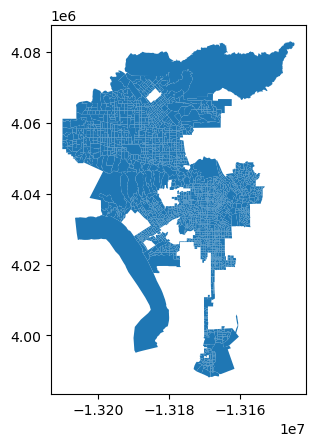

In [17]:
#Mapping the data (census data)
#get the layers into a web mercator projection
#reproject to the web mercator
gdf=gdf.to_crs(epsg=3857)
gdf.plot()

In [ ]:
#Mapping data with basemap 
import contextily as ctx
fig,ax=plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, color='blue',edgecolor='black',lw=0.5,alpha=0.4)
#no axis
ax.axis('off')
#Adding a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
#Get Arrest Data

In [18]:
#Get the bounding box coordinates from the arrest data
minx,miny,maxx,maxy=gdf.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)
#Use these bounding box coordinates to set x and y limits
ax.set_xlim(minx-1000,maxx+1000)
ax.set_ylim(miny-1000,maxy+1000)

-13210080.925686568
3988178.428889635
-13144570.629869126
4082976.435813367


(3987178.428889635, 4083976.435813367)

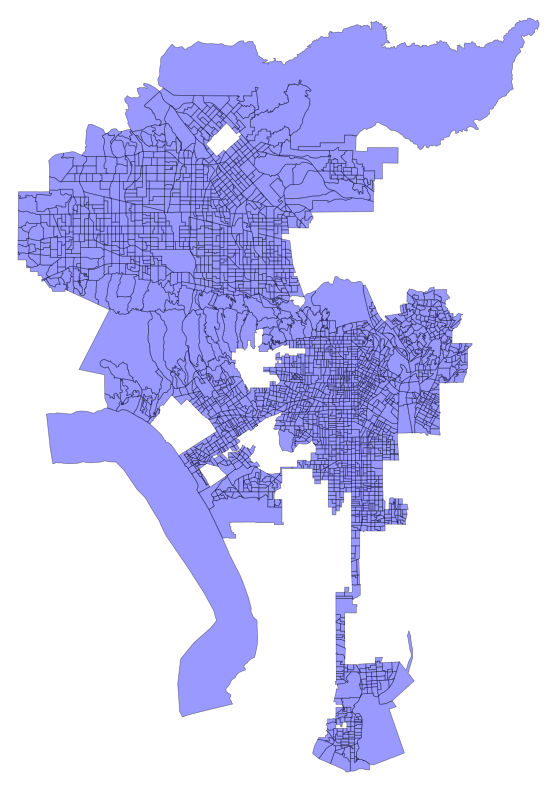

In [22]:
#import contextily as ctx
fig,ax=plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, color='blue',edgecolor='black',lw=0.5,alpha=0.4)
#no axis
ax.axis('off')
ax.set_xlim(minx-1000,maxx+1000)
ax.set_ylim(miny-1000,maxy+1000)
#Adding a basemap
#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)